# 1. BC 카드 데이터 분석

## ■ 데이터 설명
### 1. 제공: BC 카드사
### 2. 주제: 온라인 품목 상세 매출 데이터

## ■ 데이터 전처리

### ● 필요한 모듈 임포트

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from matplotlib import font_manager, rc

pd.set_option('display.max_columns', None)
warnings.filterwarnings(action='ignore')
pd.options.display.float_format = '{:.5f}'.format
plt.rc('font', family='Malgun Gothic')
plt.rc('axes', unicode_minus=False)

### ● 데이터 로드 및 데이터 살펴보기

In [8]:
bc = pd.read_csv('C:\\data\\fin\\금융보안원_경진대회_데이터(최종제출).csv')
print(bc.shape)
bc.head()

(519297, 13)


,기준년월,품목대분류코드,품목대분류명,품목중분류코드,품목중분류명,성별,연령,가구생애주기,고객소재지_광역시도,고객소재지_시군구,고객소재지_읍면동,매출금액,매출건수
0,201903,10,의류,1010,여성의류,여성,40대,초중고자녀가구,서울특별시,구로구,궁동,782521,13
1,201903,21,e상품/서비스,2110,o2o서비스,여성,20대,신혼영유아가구,서울특별시,구로구,궁동,963789,29
2,201903,19,출산/육아,1913,육아용품서비스,여성,30대,신혼영유아가구,서울특별시,구로구,궁동,924309,46
3,201903,21,e상품/서비스,2111,e머니/상품권,여성,30대,신혼영유아가구,서울특별시,구로구,궁동,1089360,54
4,201903,17,생활,1710,생활용품,여성,30대,신혼영유아가구,서울특별시,구로구,궁동,1656740,58


**-> 데이터는 총 519297 행과 13개의 컬럼으로 이루어져 있다.**

In [4]:
bc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 519297 entries, 0 to 519296
Data columns (total 13 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   기준년월        519297 non-null  int64 
 1   품목대분류코드     519297 non-null  int64 
 2   품목대분류명      519297 non-null  object
 3   품목중분류코드     519297 non-null  int64 
 4   품목중분류명      519297 non-null  object
 5   성별          519297 non-null  object
 6   연령          519297 non-null  object
 7   가구생애주기      519297 non-null  object
 8   고객소재지_광역시도  519297 non-null  object
 9   고객소재지_시군구   519297 non-null  object
 10  고객소재지_읍면동   519297 non-null  object
 11  매출금액        519297 non-null  int64 
 12  매출건수        519297 non-null  int64 
dtypes: int64(5), object(8)
memory usage: 51.5+ MB


#### -> 각 컬럼은 정수형 숫자(int64) 와 문자(object) 타입으로 구성되어 있다.

In [9]:
bc.isnull().sum()

기준년월          0
품목대분류코드       0
품목대분류명        0
품목중분류코드       0
품목중분류명        0
성별            0
연령            0
가구생애주기        0
고객소재지_광역시도    0
고객소재지_시군구     0
고객소재지_읍면동     0
매출금액          0
매출건수          0
dtype: int64

#### -> 각 컬럼의 데이터에는 결측치가 없다.

In [3]:
bc['기준년월'].unique()

array([201903, 201909, 202003, 202009, 202103], dtype=int64)

#### -> 본 데이터의 조사기간은 2019년 3월, 2019년 9월, 2020년 3월, 2020년 9월, 2021년 3월로 총 5개월임을 알 수 있다.

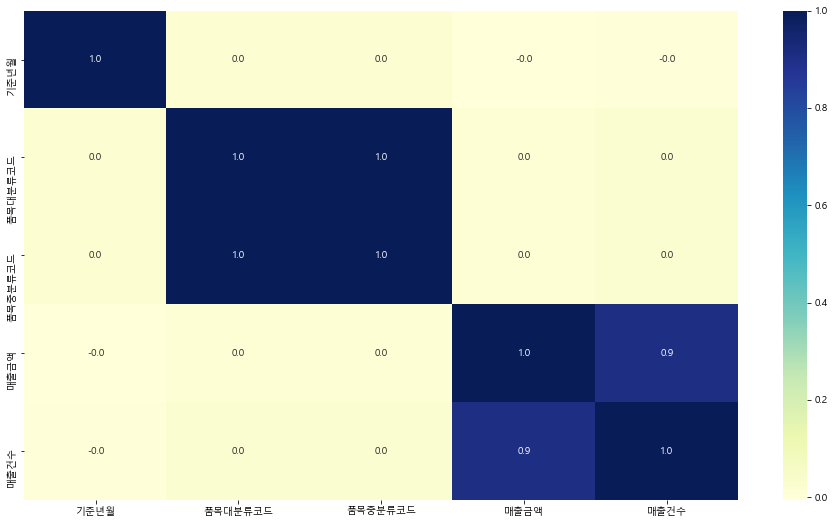

In [10]:
plt.figure(figsize=(16,9))
sns.heatmap(bc.corr(), cmap='YlGnBu', annot=True, fmt='0.1f')
plt.show()

#### -> 수치형 컬럼들간의 상관관계 중, '품목대분류코드' 와 '품목중분류코드', '매출금액' 과 '매출건수' 가 높은 상관관계를 보인다.

### ● 필요한 명목형 변수의 변환

In [11]:
bc[bc.columns[bc.dtypes.map(lambda x:x=='object')]].describe().transpose()

,count,unique,top,freq
품목대분류명,519297,13,e상품/서비스,76052
품목중분류명,519297,50,o2o서비스,42064
성별,519297,2,여성,330244
연령,519297,6,40대,159877
가구생애주기,519297,5,신혼영유아가구,178693
고객소재지_광역시도,519297,3,서울특별시,306122
고객소재지_시군구,519297,38,수원시,38891
고객소재지_읍면동,519297,685,논현동,4251


#### 각 컬럼 당 고유한 명목형 변수가 너무 많은 컬럼을 제외한다.

In [12]:
bc_e = bc.copy()

In [14]:
bc_e.drop(['품목중분류명', '고객소재지_읍면동'], axis=1, inplace=True)
bc_e.head()

,기준년월,품목대분류코드,품목대분류명,품목중분류코드,성별,연령,가구생애주기,고객소재지_광역시도,고객소재지_시군구,매출금액,매출건수
0,201903,10,의류,1010,여성,40대,초중고자녀가구,서울특별시,구로구,782521,13
1,201903,21,e상품/서비스,2110,여성,20대,신혼영유아가구,서울특별시,구로구,963789,29
2,201903,19,출산/육아,1913,여성,30대,신혼영유아가구,서울특별시,구로구,924309,46
3,201903,21,e상품/서비스,2111,여성,30대,신혼영유아가구,서울특별시,구로구,1089360,54
4,201903,17,생활,1710,여성,30대,신혼영유아가구,서울특별시,구로구,1656740,58


#### MZ세대와 MZ 아닌 세대로 구분하여 두 세대간의 차이를 통해 MZ 세대의 특징을 알아보고자 '연령' 컬럼을 인코딩 한다.

In [15]:
bc_e['연령'].unique()

array(['40대', '20대', '30대', '50대', '60대 이상', '20세 미만'], dtype=object)

In [16]:
bc_e['연령'] = bc_e['연령'].map(lambda x: 1 if x in ['20세 미만', '20대', '30대'] else 0)
bc_e['연령'].unique()

array([0, 1], dtype=int64)

#### -> MZ세대를 1, MZ 아닌 세대를 0 으로 인코딩 하였다.

In [21]:
bc_d = pd.get_dummies(bc_e)

In [28]:
corr_bc_d = bc_d.corr()
corr_bc_d = corr_bc_d.apply(lambda x: round(x, 2))
s = corr_bc_d.unstack()

In [45]:
df = pd.DataFrame(s[((0.4 < s) | (s < -0.4)) & (s != 1) & (s != -1)].sort_values(ascending=False), columns=['corr'])
df.style.background_gradient(cmap='viridis')

In [39]:
s

기준년월           기준년월             1.00000
               품목대분류코드          0.02000
               품목중분류코드          0.02000
               연령              -0.04000
               매출금액            -0.01000
                                 ...   
고객소재지_시군구_중랑구  고객소재지_시군구_용인시   -0.04000
               고객소재지_시군구_은평구   -0.02000
               고객소재지_시군구_종로구   -0.02000
               고객소재지_시군구_중구    -0.02000
               고객소재지_시군구_중랑구    1.00000
Length: 4489, dtype: float64

In [41]:
s[(0.5 < s) & (s != 1)]

품목대분류코드      품목대분류명_기타     0.96000
품목중분류코드      품목대분류명_기타     0.96000
연령           가구생애주기_1인가구   0.55000
매출금액         매출건수          0.91000
매출건수         매출금액          0.91000
품목대분류명_기타    품목대분류코드       0.96000
             품목중분류코드       0.96000
가구생애주기_1인가구  연령            0.55000
dtype: float64

#### 